In [97]:
import matplotlib.pyplot as plt
import numpy as np
from math import log
import re

with open("../../adonis_friction.txt", encoding='utf-16-le') as f:
    adonis_lines = f.readlines()

with open("../../ours_friction.txt", encoding='utf-16-le') as f:
    ours_lines = f.readlines()
    

Text(0.5, 0, 'iteration')

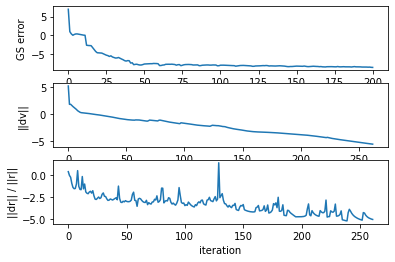

In [98]:
t = 0.2

for i, line in enumerate(adonis_lines):
    if line.startswith('# Stepping') and str(t) in line.split():
        start_idx = i
    if line.startswith('# Stepping') and str(t + 0.001) in line.split():
        end_idx = i

iter_lines = filter(lambda x: x.startswith("\tIter"), adonis_lines[start_idx: end_idx])
err = list(map(lambda x: float(x.split()[3]), iter_lines))

for i, line in enumerate(ours_lines):
    if line.startswith('# Stepping') and str(t) in line.split():
        start_idx = i
    if line.startswith('# Stepping') and str(t + 0.001) in line.split():
        end_idx = i
        
dv_lines = filter(lambda x: "dv" in x.split(), ours_lines[start_idx: end_idx])
dr_lines = filter(lambda x: "dr" in x.split(), ours_lines[start_idx: end_idx])
dv = list(map(lambda x: float(x.split()[-1]), dv_lines))
dr = list(map(lambda x: float(x.split()[-1]), dr_lines))

plt.subplot(3, 1, 1)
plt.plot([log(x) for x in err])
plt.ylabel("GS error")

plt.subplot(3, 1, 2)
plt.plot([log(x) for x in dv])
plt.ylabel("||dv||")

plt.subplot(3, 1, 3)
plt.plot([log(x) for x in dr])
plt.ylabel("||dr|| / ||r||")
plt.xlabel("iteration")